<a href="https://colab.research.google.com/github/AliVaghjipur/TrafficSigns/blob/main/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
#Traffic signs starter code

import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import pickle
import pandas as pd   #for data analysis form a csv file
import random
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:  #reading file in binary syntax = rb
  train_data = pickle.load(f)    #unpickling
with open('german-traffic-signs/valid.p', 'rb') as f:  #reading file in binary syntax = rb
  val_data = pickle.load(f)    #unpickling
with open('german-traffic-signs/test.p', 'rb') as f:  #reading file in binary syntax = rb
  test_data = pickle.load(f)    #unpickling

print(type(train_data))
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to number of labels in train"
assert(X_test.shape[0] == y_test.shape[0]), "the number of images is not equal to number of labels in test"
assert(X_val.shape[0] == y_val.shape[0]), "the number of images is not equal to number of labels in val"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the images are not (32,32,3)"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the images are not (32,32,3)"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the images are not (32,32,3)"

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

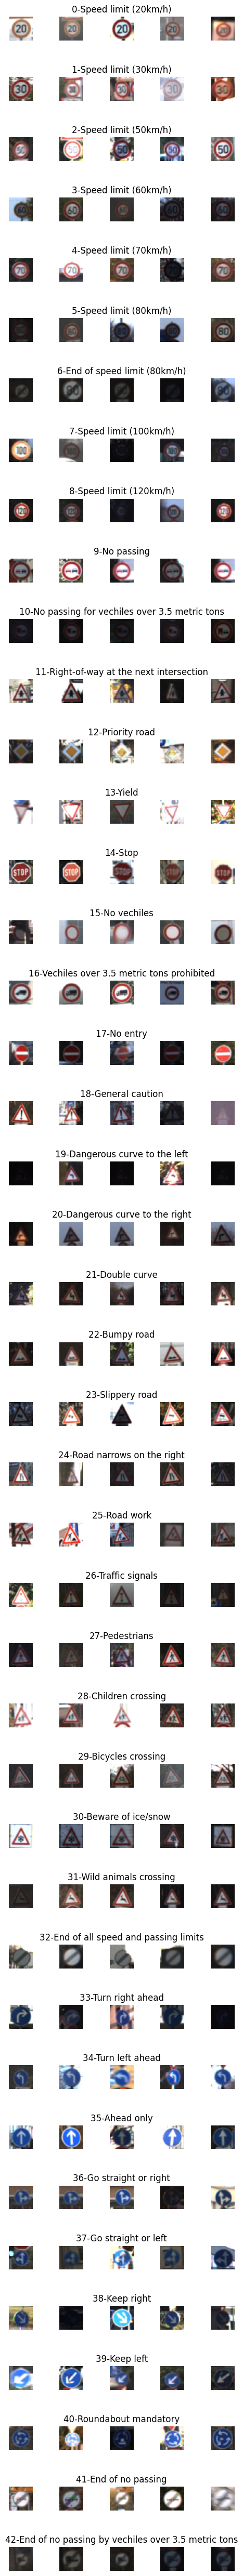

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

#code copied from MNIST code
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():   #iterates entire dataframe rows as (index, series) pair
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

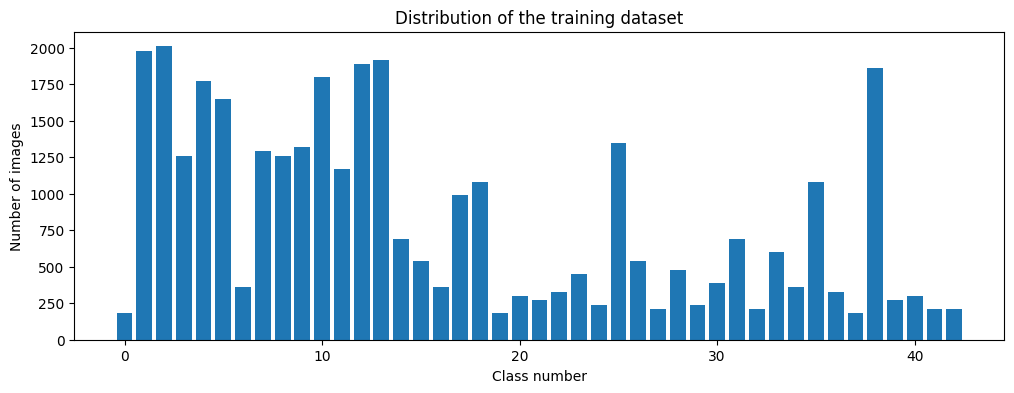

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


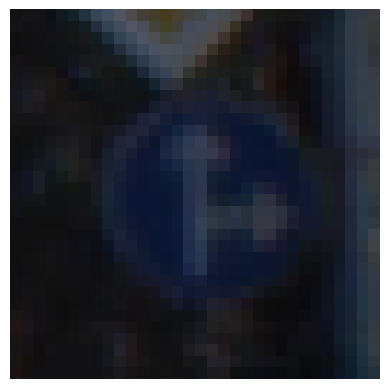

In [ ]:
import cv2

#Randomly checking the image and label in dataset
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


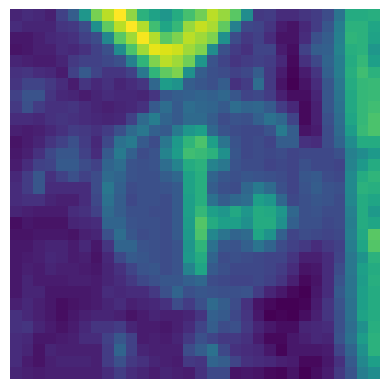

In [ ]:
#func to convert RGB to grayscale
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


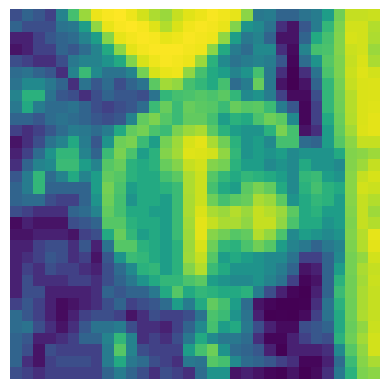

In [ ]:
#func for Histogram equalisation

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255   #normalization to bring intensities between 0 to 1
  return img

X_train = np.array(list(map(preprocessing, X_train)))    #map iterates through entire array and for every element it loops through, returns a new element based on a specified function for each item in the array, ultimately creating a new array with updated values. Hence preprocessing entire X_train dataset.
X_val = np.array(list(map(preprocessing, X_val))) 
X_test = np.array(list(map(preprocessing, X_test))) 

(34799, 32, 32)


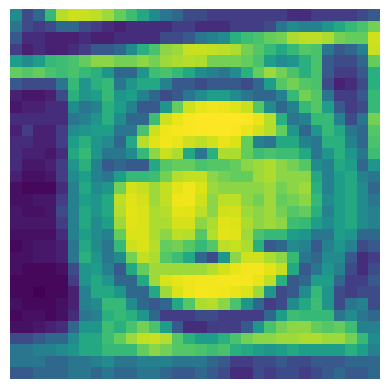

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
#Adding depth for the neural network
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [ ]:
#Generating new dataset by making transformations like rotation, zoom etc in existing images 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,   #vertical shift of the image (0-1 range is for percentage; more than 1 is for number of pixels)
                            height_shift_range=0.1,    #Horizontal shift of the image
                            zoom_range=0.2,          #Zoom out as far as(1-0.2)=0.8 and zoom in as close as(1 + 0.2) = 1.2
                            shear_range=0.1,             #shearing magnitude in degrees
                            rotation_range=10)         #in terms of degrees
            
datagen.fit(X_train)

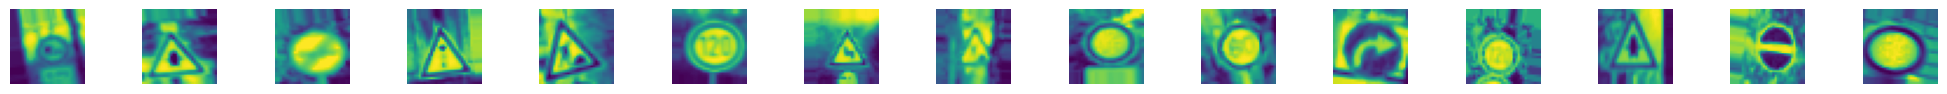

In [ ]:
#creating new images using data generator
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
#one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))    #adding additional convolution layer in the leNet model
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))    #adding additional convolution layer in the leNet model
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.5))


  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
##
  return model


In [ ]:
model = modified_model()
model.compile(Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])   ##

print(model.summary())

Model: "sequential_940"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                               

In [ ]:

history = model.fit(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=None, epochs=10, validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
696/696 [==============================] - 22s 28ms/step - loss: 1.7649 - accuracy: 0.5021 - val_loss: 0.2477 - val_accuracy: 0.9211
Epoch 2/10
696/696 [==============================] - 19s 27ms/step - loss: 0.5123 - accuracy: 0.8428 - val_loss: 0.1151 - val_accuracy: 0.9639
Epoch 3/10
696/696 [==============================] - 19s 28ms/step - loss: 0.3048 - accuracy: 0.9053 - val_loss: 0.1012 - val_accuracy: 0.9687
Epoch 4/10
696/696 [==============================] - 19s 27ms/step - loss: 0.2362 - accuracy: 0.9259 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 5/10
696/696 [==============================] - 20s 28ms/step - loss: 0.1782 - accuracy: 0.9448 - val_loss: 0.0585 - val_accuracy: 0.9844
Epoch 6/10
696/696 [==============================] - 18s 27ms/step - loss: 0.1608 - accuracy: 0.9513 - val_loss: 0.0880 - val_accuracy: 0.9744
Epoch 7/10
696/696 [==============================] - 20s 28ms/step - loss: 0.1431 - accuracy: 0.9558 - val_loss: 0.0487 - val_accuracy:

Text(0.5, 0, 'epoch')

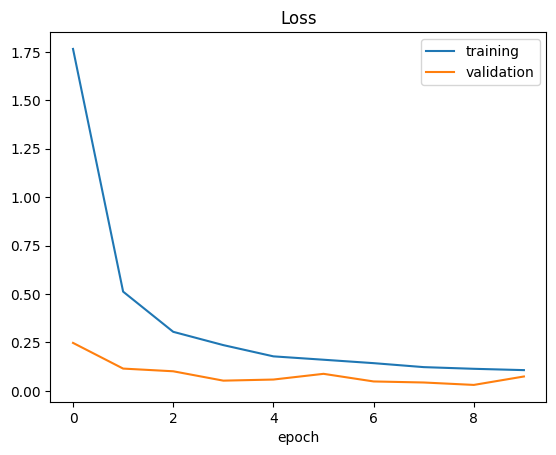

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

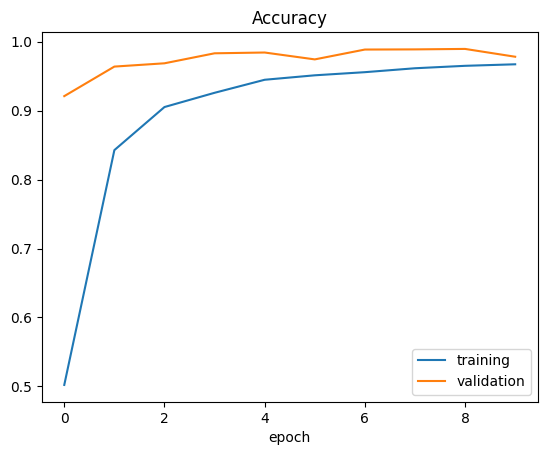

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score : ', score[0])
print('Test Accuracy : ', score[1])

Test score :  0.1306944042444229
Test Accuracy :  0.9683293700218201


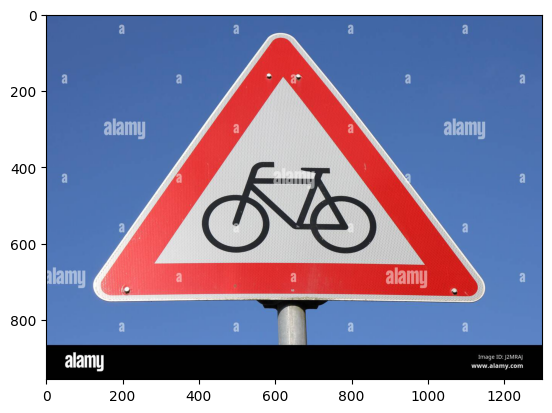

In [ ]:
#fetch image
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


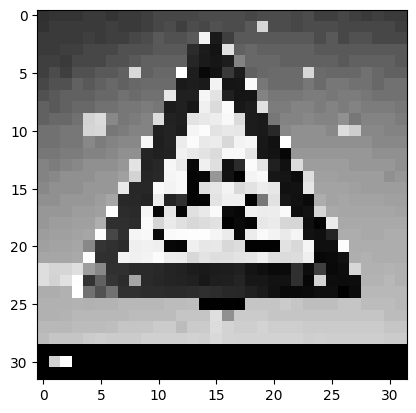

In [ ]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
# print("predicted sign: "+ str(model.predict_classes(img)))        #this code n the course doesnt work
predictions = np.argmax(model.predict(img),axis=1)                  #Instead of above, use this code.
print("Predicted sign: "+str(predictions))

1/1 [==============================] - 0s 147ms/step
Predicted sign: [29]
